In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/melb_data.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.shape

(13580, 21)

__For better undestanding of features, please see: https://datawrapper.dwcdn.net/hHuXG/4/__

## <font color='Red'> Questions </font>

<br>__1) see how many unique values does the dataframe have? - <font color='purple'> 5 points </font>__

In [5]:
unique_values = df.nunique()
unique_values

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [6]:
total_unique_values = unique_values.sum()
total_unique_values 


32783

__2) describe the null values of each features - <font color='purple'> 5 points </font>__

In [7]:
null_values = df.isna().sum()
null_values

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

__3) Deal with the na values: try to apply the best strategy. That is, if the number of nan values are too much then remove the column if the column is not necessary. Otherwise, you can remove them from the dataset or you can fill na with an appropriate strategy. Save the rearranged form as df2 without changing df - <font color='purple'> 10 points </font>__

In [8]:
df2 = df.interpolate()
df2.isna().sum()


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        1
YearBuilt           1
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
df2 = df2.drop(['CouncilArea','BuildingArea','YearBuilt'], axis=1)
df2.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

__4) Select the 'Suburb', 'Address', 'Rooms', 'Type', 'Price','Distance', 'Bedroom2', 'Bathroom', 'Car',
    'Regionname', 'Propertycount' columns to describe df3: <font color='purple'> 5 points </font>__

In [10]:
df3 = df[['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Regionname', 'Propertycount']]
df3.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,2.914728,1.534242,1.610075,7454.417378
std,0.955748,6.393107e+05,5.868725,0.965921,0.691712,0.962634,4378.581772
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,249.000000
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,4380.000000
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,6555.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,10331.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,21650.000000


__5) Describe the statistics of the dataset: <font color='purple'> 10 points </font>__

In [11]:
# without cathegorical data
import numpy as np
data_numeric = df.select_dtypes(include=[np.number])
data_numeric.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [12]:
# with categorical data
df.describe(include='all')


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,13580,13580,13580.000000,13580,1.358000e+04,13580,13580,13580,13580.000000,13580.000000,...,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,12211,13580.000000,13580.000000,13580,13580.000000
unique,314,13378,NaN,3,NaN,5,268,58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,36 Aberfeldie St,NaN,h,NaN,S,Nelson,27/05/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Moreland,NaN,NaN,Southern Metropolitan,NaN
freq,359,3,NaN,9449,NaN,9022,1565,473,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1163,NaN,NaN,4695,NaN
mean,NaN,NaN,2.937997,NaN,1.075684e+06,NaN,NaN,NaN,10.137776,3105.301915,...,1.534242,1.610075,558.416127,151.967650,1964.684217,NaN,-37.809203,144.995216,NaN,7454.417378
std,NaN,NaN,0.955748,NaN,6.393107e+05,NaN,NaN,NaN,5.868725,90.676964,...,0.691712,0.962634,3990.669241,541.014538,37.273762,NaN,0.079260,0.103916,NaN,4378.581772
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.182550,144.431810,NaN,249.000000
25%,NaN,NaN,2.000000,NaN,6.500000e+05,NaN,NaN,NaN,6.100000,3044.000000,...,1.000000,1.000000,177.000000,93.000000,1940.000000,NaN,-37.856822,144.929600,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.030000e+05,NaN,NaN,NaN,9.200000,3084.000000,...,1.000000,2.000000,440.000000,126.000000,1970.000000,NaN,-37.802355,145.000100,NaN,6555.000000
75%,NaN,NaN,3.000000,NaN,1.330000e+06,NaN,NaN,NaN,13.000000,3148.000000,...,2.000000,2.000000,651.000000,174.000000,1999.000000,NaN,-37.756400,145.058305,NaN,10331.000000


__6)Describe the counts of unique values of 'Suburb','Type','Regionname', 'Propertycount'   <font color='purple'> 10 points </font>__

In [13]:
print("Number of unique values in column 'Suburb':", df['Suburb'].nunique())
print("Number of unique values in column 'Type':", df['Type'].nunique())
print("Number of unique values in column 'Regionname':", df['Regionname'].nunique())
print("Number of unique values in column 'Propertycount':", df['Propertycount'].nunique())


Number of unique values in column 'Suburb': 314
Number of unique values in column 'Type': 3
Number of unique values in column 'Regionname': 8
Number of unique values in column 'Propertycount': 311


__7) Describe the outliers by box plot: Write a a loop for the object columns of df3 whose number of unique values is less than 10.  <font color='purple'> 15 points </font>__

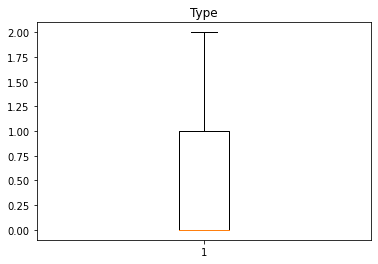

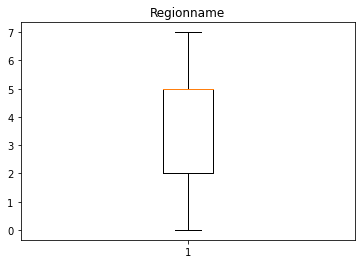

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


obj_cols = df3.select_dtypes(include='object').columns
for col in obj_cols:
    if df3[col].nunique() < 10:
        le = LabelEncoder()
        df3[col] = le.fit_transform(df3[col])
        fig, ax = plt.subplots()
        ax.boxplot(df3[col])
        ax.set_title(col)
        plt.show()




__8) Describe the correlation of df3: <font color='purple'> 10 points </font>__

In [15]:
correlation = df3.corr()
print(correlation)


                  Rooms      Type     Price  Distance  Bedroom2  Bathroom  \
Rooms          1.000000 -0.554141  0.496634  0.294203  0.944190  0.592934   
Type          -0.554141  1.000000 -0.414566 -0.234845 -0.533994 -0.231465   
Price          0.496634 -0.414566  1.000000 -0.162522  0.475951  0.467038   
Distance       0.294203 -0.234845 -0.162522  1.000000  0.295927  0.127155   
Bedroom2       0.944190 -0.533994  0.475951  0.295927  1.000000  0.584685   
Bathroom       0.592934 -0.231465  0.467038  0.127155  0.584685  1.000000   
Car            0.408483 -0.273306  0.238979  0.262994  0.405325  0.322246   
Regionname    -0.028661  0.065048  0.079109 -0.096808 -0.034797  0.025680   
Propertycount -0.081530  0.082663 -0.042153 -0.054910 -0.081350 -0.052201   

                    Car  Regionname  Propertycount  
Rooms          0.408483   -0.028661      -0.081530  
Type          -0.273306    0.065048       0.082663  
Price          0.238979    0.079109      -0.042153  
Distance       0.

__10) Describe the address # of rooms, # of bathrooms, distance for the highest Price house?: <font color='purple'> 10 points </font>__

In [16]:
highest_price_index = df3['Price'].idxmax()
highest_price_address = df3.at[highest_price_index, 'Address']
highest_price_rooms = df3.at[highest_price_index, 'Rooms']
highest_price_bathrooms = df3.at[highest_price_index, 'Bathroom']
highest_price_distance = df3.at[highest_price_index, 'Distance']

print("The highest priced house is located at:", highest_price_address)
print("It has", highest_price_rooms, "rooms.")
print("It has", highest_price_bathrooms, "bathrooms.")
print("It is", highest_price_distance, "km away from the city center.")


The highest priced house is located at: 35 Bevis St
It has 3 rooms.
It has 1.0 bathrooms.
It is 18.8 km away from the city center.


__11) Is there any signaficant relation between Regionname and Price? - <font color='purple'> 20 points </font>__

In [18]:
import scipy.stats as stats

region_names = df3['Regionname'].unique()
for region_name in region_names:
    region_prices = df3[df3['Regionname'] == region_name]['Price']
    t, p = stats.ttest_1samp(region_prices, df3['Price'].mean())
    if p < 0.05:
        print("There is a significant difference in the mean price between", region_name, "and the overall dataset.")
    else:
        print("There is no significant difference in the mean price between", region_name, "and the overall dataset.")


There is a significant difference in the mean price between 2 and the overall dataset.
There is a significant difference in the mean price between 6 and the overall dataset.
There is a significant difference in the mean price between 5 and the overall dataset.
There is a significant difference in the mean price between 0 and the overall dataset.
There is a significant difference in the mean price between 4 and the overall dataset.
There is a significant difference in the mean price between 1 and the overall dataset.
There is a significant difference in the mean price between 3 and the overall dataset.
There is a significant difference in the mean price between 7 and the overall dataset.
